In [1]:
#Cargo librerias que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import gridspec
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
#ploteo genérico para un gráfico
def ploteo_1_graph(nombre, theta2, Y, titulo, xlabel, ylabel):
    plt.plot(np.rad2deg(theta2), Y)
    plt.title(titulo, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [3]:
#ploteo genérico para dos gráficos
def ploteo_2_graph(nombre, theta2, Y1, Y2, titulo, label1, label2, xlabel1, ylabel1, xlabel2, ylabel2):
    fig=plt.figure()
    gs = gridspec.GridSpec(2, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    fig.suptitle(titulo, fontsize=16)
    ax1.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    ax2.plot(np.rad2deg(theta2), Y2, label=label2)
    ax1.set_xlabel(xlabel1, fontsize=14)
    ax1.set_ylabel(ylabel1, fontsize=14)
    ax2.set_xlabel(xlabel2, fontsize=14)
    ax2.set_ylabel(ylabel2, fontsize=14)
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [4]:
#ploteo genérico para dos gráficos
def ploteo_2_graph_alter(nombre, theta2, Y1, Y2, titulo, label1, label2, xlabel, ylabel):
    plt.title(titulo)
    plt.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    plt.plot(np.rad2deg(theta2), Y2, label=label2)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=14)
    plt.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [5]:
#ploteo genérico para 3 gráficos
def ploteo_3_graph(nombre, theta2, Y1, Y2, Y3, titulo, label1, label2, label3, xlabel1, ylabel1, xlabel2, ylabel2, xlabel3, ylabel3):
    fig=plt.figure()
    fig=plt.figure(figsize=(15, 4.2))
    gs = gridspec.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[:, 1])
    fig.suptitle(titulo, fontsize=16)
    ax1.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    ax2.plot(np.rad2deg(theta2), Y2, label=label2)
    ax3.plot(np.rad2deg(theta2), Y3, color='orange', label=label3)
    ax1.set_xlabel(xlabel1, fontsize=14)
    ax1.set_ylabel(ylabel1, fontsize=14)
    ax2.set_xlabel(xlabel2, fontsize=14)
    ax2.set_ylabel(ylabel2, fontsize=14)
    ax3.set_xlabel(xlabel3, fontsize=14)
    ax3.set_ylabel(ylabel3, fontsize=14)
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)
    ax3.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax3.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [6]:
#Solver del sistema de ecuaciones no lineal acoplado
def equations(semilla, *args):
    theta3, theta4 = semilla
    #arg0=a, arg1=b, arg2=c, arg3=d, arg4=theta1, arg4=theta2 ----> para no perderse
    eq1=args[0]*np.cos(args[5])+args[1]*np.cos(theta3)-args[2]*np.cos(theta4)-args[3]*np.cos(args[4]) #esto puede cambiar según cómo orientes los vectores
    eq2=args[0]*np.sin(args[5])+args[1]*np.sin(theta3)-args[2]*np.sin(theta4)-args[3]*np.sin(args[4]) #esto puede cambiar según cómo orientes los vectores
    return [eq1, eq2]

In [7]:
#Datos de entrada
theta1=np.arctan(1200/1600)+np.pi/2 #ángulo entre los sistemas de coordenadas
d=2000 #largo de eslabones 
a=350
b=2000
c=1280
e=1980 #distancia O4-CG4
delta=np.deg2rad(14) #ángulo entre el eslabón y O4-CG4
omega2=4*2*np.pi/60 #velocidad angular de entrada, la convierto de rpm a rad/s
alfa2=0 #no tiene aceleración angular (el eslabón 2)
l=[a, b, c, d] #lista con los largos de eslabones

#se me hizo mas facil copiar y pegar esto que cargar los .txt que ya habia obtenido antes
semilla=[0, 0]
theta2_lista=np.linspace(0,2*np.pi,10000)
resultados = [fsolve(equations, semilla, (a, b, c, d, theta1, theta2)) for theta2 in theta2_lista]
theta3_lista=[resultados[x][0] for x in range(len(resultados))] 
theta4_lista=[resultados[x][1] for x in range(len(resultados))]

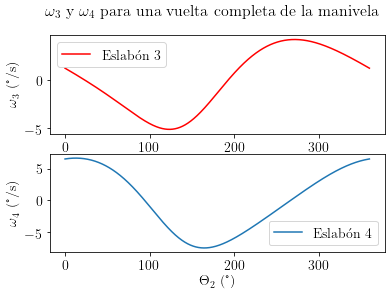

In [8]:
#Apartado a
omega3_lista=[(a*omega2*np.sin(theta4_lista[i]-theta2_lista[i]))/(b*np.sin(theta3_lista[i]-theta4_lista[i])) for i in range(len(theta2_lista))] #obtengo omega 3 según la fórmula del libro
omega4_lista=[(a*omega2*np.sin(theta2_lista[i]-theta3_lista[i]))/(c*np.sin(theta4_lista[i]-theta3_lista[i])) for i in range(len(theta2_lista))] #same para omega 4
titulo='$\omega_3$ y $\omega_4$ para una vuelta completa de la manivela' #definiciones para ploteo
label1='Eslabón 3'
label2='Eslabón 4'
xlabel1='$\Theta_2$ (°)'
ylabel1='$\omega_3$ (°/s)'
xlabel2='$\Theta_2$ (°)'
ylabel2='$\omega_4$ (°/s)'
ploteo_2_graph('omega3_y_omega4.png', theta2_lista, np.rad2deg(omega3_lista), np.rad2deg(omega4_lista), titulo, label1, label2, xlabel1, ylabel1, xlabel2, ylabel2) #ploteo omega 3 y omega 4 para una vuelta completa de la manivela

<Figure size 432x288 with 0 Axes>

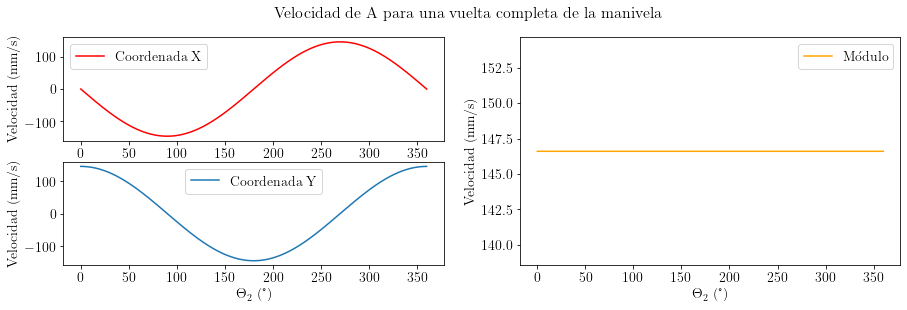

<Figure size 432x288 with 0 Axes>

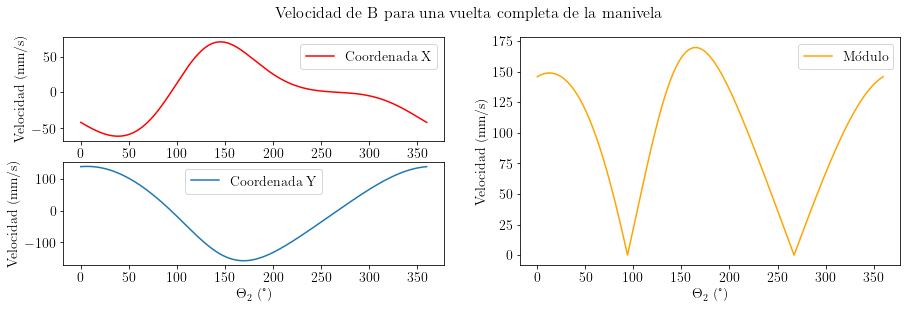

In [9]:
#Apartado b
VA_X=-a*omega2*np.sin(theta2_lista) #obtengo Va coordenada X
VA_Y=a*omega2*np.cos(theta2_lista) #same coord Y
VA=[a*omega2]*len(theta2_lista) #modulo de la velocidad
VB_X=[-a*omega2*np.sin(theta2_lista[i])-b*omega3_lista[i]*np.sin(theta3_lista[i]) for i in range(len(theta2_lista))] #obtengo Vb coord X según libro
VB_Y=[a*omega2*np.cos(theta2_lista[i])+b*omega3_lista[i]*np.cos(theta3_lista[i]) for i in range(len(theta2_lista))] #same with coord Y
VB=[np.sqrt(VB_X[i]**2+VB_Y[i]**2) for i in range(len(theta2_lista))] #obtengo modulo de la velocidad 
titulo1='Velocidad de A para una vuelta completa de la manivela' #shit para el ploteo
titulo2='Velocidad de B para una vuelta completa de la manivela'
label1='Coordenada X'
label2='Coordenada Y'
label3='Módulo'
xlabel1='$\Theta_2$ (°)'
ylabel1='Velocidad (mm/s)'
ploteo_3_graph('velocidad_A.png', theta2_lista, VA_X, VA_Y, VA, titulo1, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1) #ploteo Va
ploteo_3_graph('velocidad_B.png', theta2_lista, VB_X, VB_Y, VB, titulo2, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1) #ploteo Vb

<Figure size 432x288 with 0 Axes>

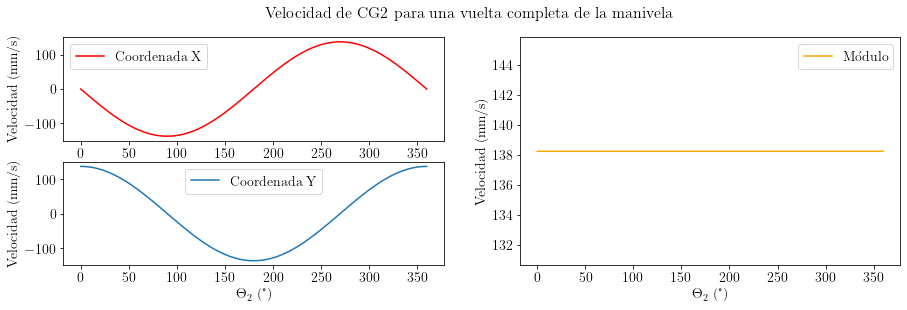

<Figure size 432x288 with 0 Axes>

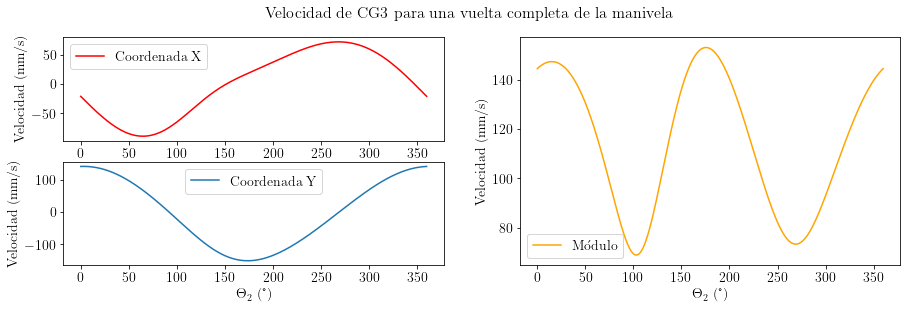

<Figure size 432x288 with 0 Axes>

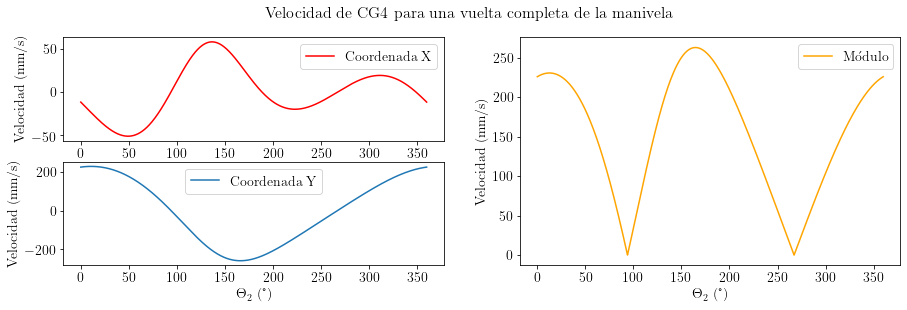

In [10]:
#Apartado c
VCG2_X=-a*omega2*np.sin(theta2_lista)*33/35 #obtengo Vcg2 coord X
VCG2_Y=a*omega2*np.cos(theta2_lista)*33/35 #same with Y
VCG2=[a*omega2*33/35]*len(theta2_lista) #Modulo de la velocidad de CG2
VCG3_X=[-a*omega2*np.sin(theta2_lista[i])-b/2*omega3_lista[i]*np.sin(theta3_lista[i]) for i in range(len(theta2_lista))] #repito para VCG3 según fórmula del libro 
VCG3_Y=[a*omega2*np.cos(theta2_lista[i])+b/2*omega3_lista[i]*np.cos(theta3_lista[i]) for i in range(len(theta2_lista))] #la otra coordenada
VCG3=[np.sqrt(VCG3_X[i]**2+VCG3_Y[i]**2) for i in range(len(theta2_lista))] #módulo
VCG4_X=[-e*omega4_lista[i]*np.sin(theta4_lista[i]-delta) for i in range(len(theta2_lista))] #y ahora le toca a CG4
VCG4_Y=[e*omega4_lista[i]*np.cos(theta4_lista[i]-delta) for i in range(len(theta2_lista))] #coord Y
VCG4=[np.sqrt(VCG4_X[i]**2+VCG4_Y[i]**2) for i in range(len(theta2_lista))] #módulo
titulo1='Velocidad de CG2 para una vuelta completa de la manivela' #shit para ploteo
titulo2='Velocidad de CG3 para una vuelta completa de la manivela'
titulo3='Velocidad de CG4 para una vuelta completa de la manivela'
label1='Coordenada X'
label2='Coordenada Y'
label3='Módulo'
xlabel='$\Theta_2$ (°)'
ylabel='Velocidad (mm/s)'
ploteo_3_graph('velocidad_CG2.png', theta2_lista, VCG2_X, VCG2_Y, VCG2, titulo1, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1) #ploteo VCG2
ploteo_3_graph('velocidad_CG3.png', theta2_lista, VCG3_X, VCG3_Y, VCG3, titulo2, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1) #ploteo VCG3
ploteo_3_graph('velocidad_CG4.png', theta2_lista, VCG4_X, VCG4_Y, VCG4, titulo3, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1) #ploteo VCG4

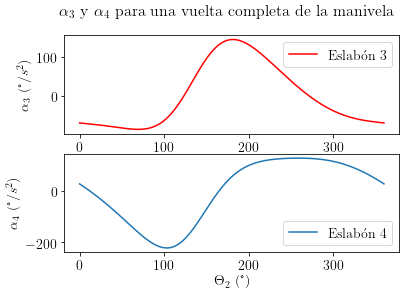

In [11]:
#Apartado d
A=c*np.sin(theta4_lista) #la fórmula del libro requiere de estas definiciones
B=b*np.sin(theta3_lista)
C=a*alfa2*np.sin(theta2_lista)+a*omega2**2*np.cos(theta2_lista)+b*np.array(omega3_lista)**2*np.cos(theta3_lista)-c*np.array(omega4_lista)**2*np.cos(theta4_lista)
#C=a*np.rad2deg(alfa2)*np.sin(theta2_lista)+a*np.rad2deg(omega2)**2*np.cos(theta2_lista)+b*np.rad2deg(np.array(omega3_lista))**2*np.cos(theta3_lista)-c*np.rad2deg(np.array(omega4_lista))**2*np.cos(theta4_lista)
D=c*np.cos(theta4_lista)
E=b*np.cos(theta3_lista)
F=a*alfa2*np.cos(theta2_lista)-a*omega2**2*np.sin(theta2_lista)-b*np.array(omega3_lista)**2*np.sin(theta3_lista)+c*np.array(omega4_lista)**2*np.sin(theta4_lista)
#F=a*np.rad2deg(alfa2)*np.cos(theta2_lista)-a*np.rad2deg(omega2)**2*np.sin(theta2_lista)-b*np.rad2deg(np.array(omega3_lista))**2*np.sin(theta3_lista)+c*np.rad2deg(np.array(omega4_lista))**2*np.sin(theta4_lista)
alfa3_lista=[(C[i]*D[i]-A[i]*F[i])/(E[i]*A[i]-B[i]*D[i]) for i in range(len(theta2_lista))] #obtengo aceleracion angular 3 según fórmula del libro
alfa4_lista=[(C[i]*E[i]-B[i]*F[i])/(E[i]*A[i]-B[i]*D[i]) for i in range(len(theta2_lista))] #same para alfa 4
#alfa3_lista=np.deg2rad(alfa3_listadeg)
#alfa4_lista=np.deg2rad(alfa4_listadeg)
np.savetxt('alfa3.txt', alfa3_lista) #guardo los valores obtenidos
np.savetxt('alfa4.txt', alfa4_lista) #guardo valores obtenidos

titulo=r'$\alpha_3$ y $\alpha_4$ para una vuelta completa de la manivela' #shit de ploteo
label1='Eslabón 3'
label2='Eslabón 4'
xlabel1='$\Theta_2$ (°)'
ylabel1=r'$\alpha_3$ (°/$s^2$)'
xlabel2='$\Theta_2$ (°)'
ylabel2=r'$\alpha_4$ (°/$s^2$)'
ploteo_2_graph('Alpha3_y_alpha4.png', theta2_lista, np.rad2deg(np.rad2deg(alfa3_lista)), np.rad2deg(np.rad2deg(alfa4_lista)), titulo, label1, label2, xlabel1, ylabel1, xlabel2, ylabel2) #ploteo los resultados

<Figure size 432x288 with 0 Axes>

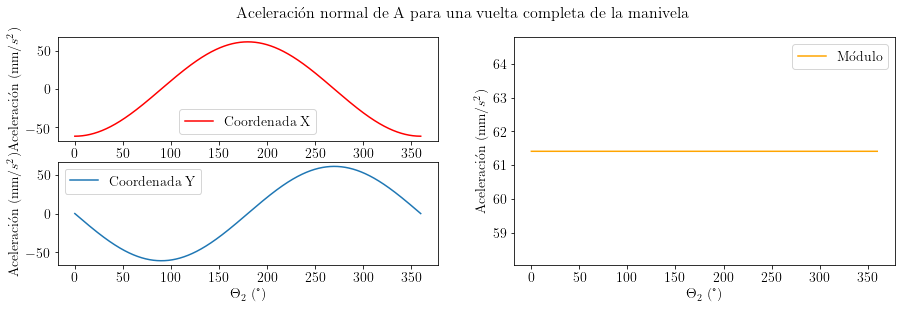

<Figure size 432x288 with 0 Axes>

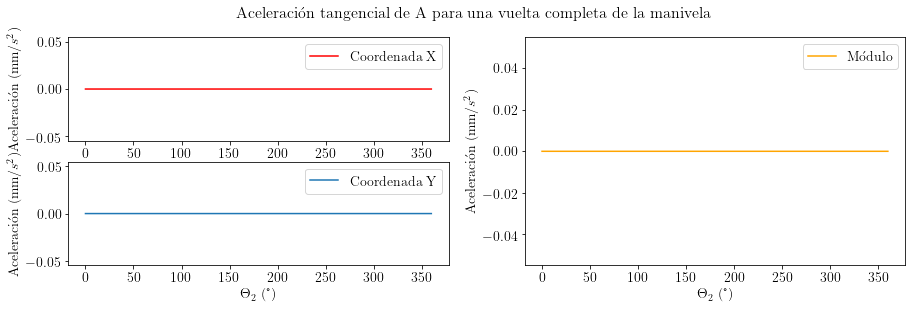

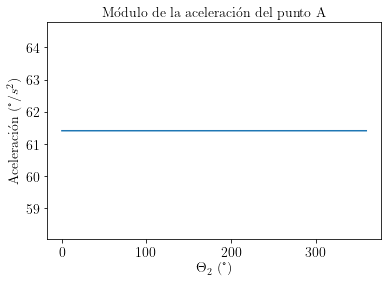

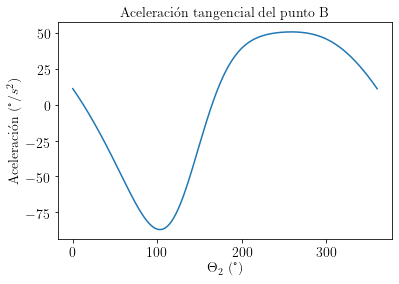

<Figure size 432x288 with 0 Axes>

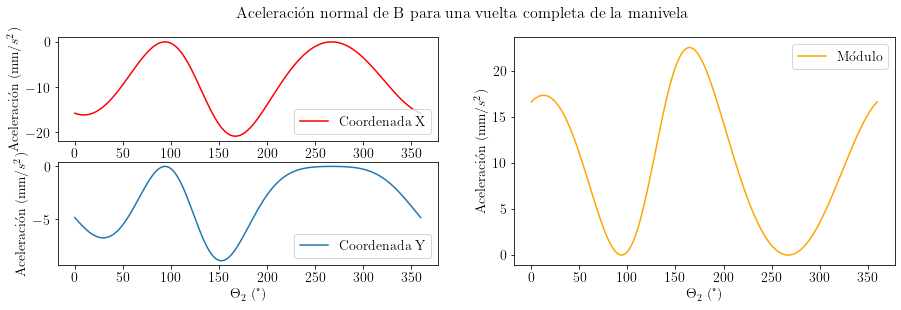

<Figure size 432x288 with 0 Axes>

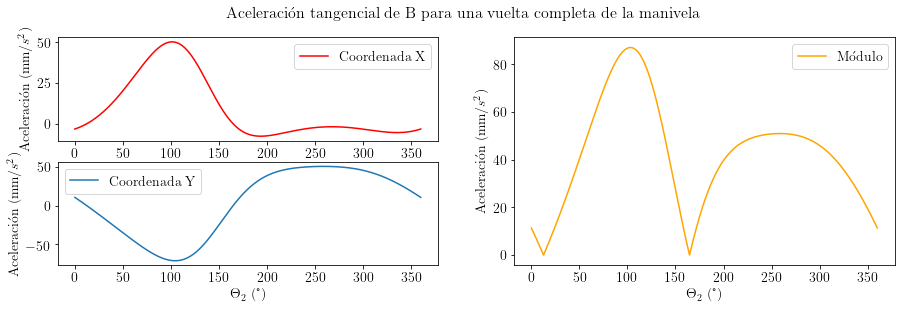

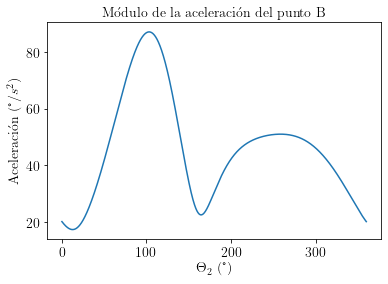

In [12]:
#Apartado e
AAc_X=-a*omega2**2*np.cos(theta2_lista) #aceleración centrípeta de A coordenada X
AAc_Y=-a*omega2**2*np.sin(theta2_lista) #same coordenada Y
AAc=[np.sqrt(AAc_X[i]**2+AAc_Y[i]**2) for i in range(len(theta2_lista))] #obtengo el módulo de la aceleración centripeta de A
AAt_X=-a*alfa2*np.sin(theta2_lista) #aceleración tangencial de A coordenada X
AAt_Y=a*alfa2*np.cos(theta2_lista) #coordenada Y de la aceleración tangencial de A
AAt=[np.sqrt(AAt_X[i]**2+AAt_Y[i]**2) for i in range(len(theta2_lista))] #módulo de la aceleración tangencial punto A
AA_X=AAc_X+AAt_X #esta es la coordenada X de la aceleración (recordemos que esta rotando, por lo tanto tendrá parte centrípeta y parte tangencial)
AA_Y=AAc_Y+AAt_Y #coordenada Y de la aceleración
AA=np.sqrt(np.array(AA_X)**2+np.array(AA_Y)**2) #módulo de la aceleración de A

ABc_X=[-c*omega4_lista[i]**2*np.cos(theta4_lista[i]) for i in range(len(theta2_lista))] #ac. centrípeta de B según libro, coordenada X
ABc_Y=[-c*omega4_lista[i]**2*np.sin(theta4_lista[i]) for i in range(len(theta2_lista))] #coordenada Y
ABc=[np.sqrt(ABc_X[i]**2+ABc_Y[i]**2) for i in range(len(theta2_lista))] #módulo de la aceleración normal punto B
ABt_X=[-c*alfa4_lista[i]*np.sin(theta4_lista[i]) for i in range(len(theta2_lista))] #coord X aceleración tangencial punto B según libro
ABt_Y=[c*alfa4_lista[i]*np.cos(theta4_lista[i]) for i in range(len(theta2_lista))] #coord Y aceleración tangencial punto B
ABt=[np.sqrt(ABt_X[i]**2+ABt_Y[i]**2) for i in range(len(theta2_lista))] #módulo de la aceleración tangencial punto B
ABt_signo=[-ABt[i] if alfa4_lista[i]<0 else ABt[i] for i in range(len(theta2_lista))] #esto porque si no se produce un quiebre en la función (ver figuras obtenidas)
AB_X=[ABc_X[i]+ABt_X[i] for i in range(len(theta2_lista))] #coordenada X de la aceleración total de B
AB_Y=[ABc_Y[i]+ABt_Y[i] for i in range(len(theta2_lista))] #coordenada Y de la aceleración total de B
AB=np.sqrt(np.array(AB_X)**2+np.array(AB_Y)**2) #módulo de la aceleración de B

titulo1='Aceleración normal de A para una vuelta completa de la manivela' #shit de ploteo
titulo2='Aceleración tangencial de A para una vuelta completa de la manivela'
titulo3='Aceleración normal de B para una vuelta completa de la manivela'
titulo4='Aceleración tangencial de B para una vuelta completa de la manivela'
label1='Coordenada X'
label2='Coordenada Y'
label3='Módulo'
xlabel1='$\Theta_2$ (°)'
ylabel1='Aceleración (mm/$s^2$)'
#ploteo
ploteo_3_graph('aceleracionA_normal.png', theta2_lista, AAc_X, AAc_Y, AAc, titulo1, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
ploteo_3_graph('aceleracionA_tangencial.png', theta2_lista, AAt_X, AAt_Y, AAt, titulo2, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
ploteo_1_graph('aceleracionA.png', theta2_lista, AA, 'Módulo de la aceleración del punto A', '$\Theta_2$ (°)', 'Aceleración (°/$s^2$)')
ploteo_1_graph('aceleracionB_signo.png', theta2_lista, ABt_signo, 'Aceleración tangencial del punto B', '$\Theta_2$ (°)', 'Aceleración (°/$s^2$)')
ploteo_3_graph('aceleracionB_normal.png', theta2_lista, ABc_X, ABc_Y, ABc, titulo3, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
ploteo_3_graph('aceleracionB_tangencial.png', theta2_lista, ABt_X, ABt_Y, ABt, titulo4, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
ploteo_1_graph('aceleracionB.png', theta2_lista, AB, 'Módulo de la aceleración del punto B', '$\Theta_2$ (°)', 'Aceleración (°/$s^2$)')

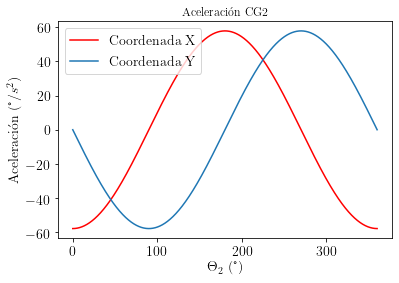

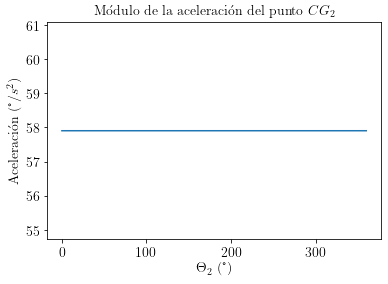

<Figure size 432x288 with 0 Axes>

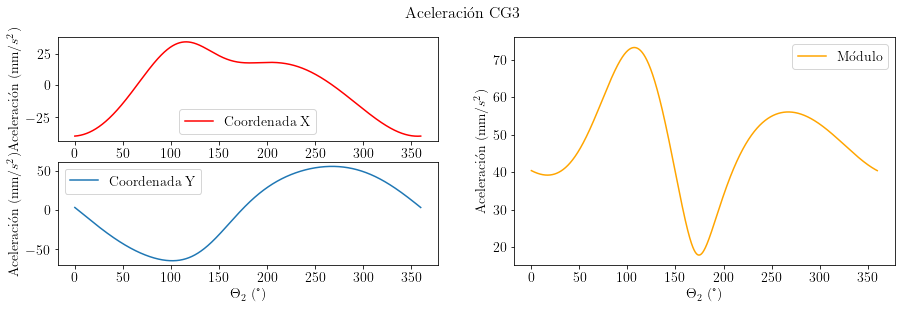

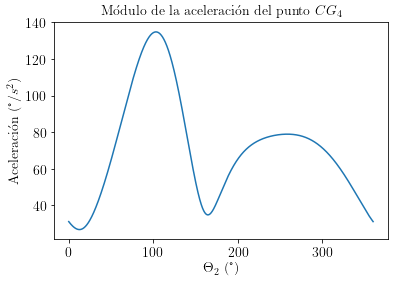

In [17]:
#Apartado f
ACG2c_X=-a*33/35*omega2**2*np.cos(theta2_lista) #same shit para el punto CG2
ACG2c_Y=-a*33/35*omega2**2*np.sin(theta2_lista)
ACG2c=[np.sqrt(ACG2c_X[i]**2+ACG2c_Y[i]**2) for i in range(len(theta2_lista))]
ACG2t_X=-a*alfa2*np.sin(theta2_lista)
ACG2t_Y=a*alfa2*np.cos(theta2_lista)
ACG2t=[np.sqrt(ACG2t_X[i]**2+ACG2t_Y[i]**2) for i in range(len(theta2_lista))]
ACG2_X=ACG2c_X+ACG2t_X
ACG2_Y=ACG2c_Y+ACG2t_Y
ACG2=np.sqrt(np.array(ACG2_X)**2+np.array(ACG2_Y)**2)
np.savetxt('ACG2.txt', [[ACG2_X[i], ACG2_Y[i]] for i in range(len(theta2_lista))]) #guardo aceleración total coord X e Y del CG2

AACG3_X=np.array([b/2*(-alfa3_lista[i]*np.sin(theta3_lista[i])-omega3_lista[i]**2*np.cos(theta3_lista[i])) for i in range(len(theta2_lista))]) #same shit CG3
AACG3_Y=np.array([b/2*(alfa3_lista[i]*np.cos(theta3_lista[i])-omega3_lista[i]**2*np.sin(theta3_lista[i])) for i in range(len(theta2_lista))])
ACG3_X=AA_X+AACG3_X
ACG3_Y=AA_Y+AACG3_Y
ACG3=np.sqrt(ACG3_X**2+ACG3_Y**2)
np.savetxt('ACG3.txt', [[ACG3_X[i], ACG3_Y[i]] for i in range(len(theta2_lista))]) #guardo resultados de aceleración CG3

ACG4c_X=[-e*omega4_lista[i]**2*np.cos(theta4_lista[i]-delta) for i in range(len(theta2_lista))] #same CG4
ACG4c_Y=[-e*omega4_lista[i]**2*np.sin(theta4_lista[i]-delta) for i in range(len(theta2_lista))]
ACG4c=[np.sqrt(ACG4c_X[i]**2+ACG4c_Y[i]**2) for i in range(len(theta2_lista))]
ACG4t_X=[-e*alfa4_lista[i]*np.sin(theta4_lista[i]-delta) for i in range(len(theta2_lista))]
ACG4t_Y=[e*alfa4_lista[i]*np.cos(theta4_lista[i]-delta) for i in range(len(theta2_lista))]
ACG4t=[np.sqrt(ACG4t_X[i]**2+ACG4t_Y[i]**2) for i in range(len(theta2_lista))]
ACG4_X=[-e*alfa4_lista[i]*np.sin(theta4_lista[i]-delta)-e*omega4_lista[i]**2*np.cos(theta4_lista[i]-delta) for i in range(len(theta2_lista))]
ACG4_Y=[e*alfa4_lista[i]*np.cos(theta4_lista[i]-delta)-e*omega4_lista[i]**2*np.sin(theta4_lista[i]-delta) for i in range(len(theta2_lista))]
ACG4=np.sqrt(np.array(ACG4_X)**2+np.array(ACG4_Y)**2)
np.savetxt('ACG4.txt', [[ACG4_X[i], ACG4_Y[i]] for i in range(len(theta2_lista))]) #same CG4
 
titulo1='Aceleración normal de $CG_2$ para una vuelta completa de la manivela' #shit ploteo
titulo2='Aceleración tangencial de $CG_2$ para una vuelta completa de la manivela'
titulo3='Aceleración normal de $CG_4$ para una vuelta completa de la manivela'
titulo4='Aceleración tangencial de $CG_4$ para una vuelta completa de la manivela'
label1='Coordenada X'
label2='Coordenada Y'
label3='Módulo'
xlabel1='$\Theta_2$ (°)'
ylabel1='Aceleración (mm/$s^2$)'
#ploteo
#ploteo_3_graph('aceleracionCG2_normal.png', theta2_lista, ACG2c_X, ACG2c_Y, ACG2c, titulo1, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
#ploteo_3_graph('aceleracionCG2_tangencial.png', theta2_lista, ACG2t_X, ACG2t_Y, ACG2t, titulo2, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
ploteo_2_graph_alter('aceleracionCG2_XY.png', theta2_lista, ACG2_X, ACG2_Y, 'Aceleración CG2', 'Coordenada X', 'Coordenada Y', '$\Theta_2$ (°)%', 'Aceleración (°/$s^2$)')
ploteo_1_graph('aceleracionCG2.png', theta2_lista, ACG2, 'Módulo de la aceleración del punto $CG_2$', '$\Theta_2$ (°)', 'Aceleración (°/$s^2$)')
ploteo_3_graph('aceleracionCG3_XY.png', theta2_lista, ACG3_X, ACG3_Y, ACG3, 'Aceleración CG3', label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
#ploteo_3_graph('aceleracionCG4_normal.png', theta2_lista, ACG4c_X, ACG4c_Y, ACG4c, titulo3, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)
#ploteo_3_graph('aceleracionCG4_tangencial.png', theta2_lista, ACG4t_X, ACG4t_Y, ACG4t, titulo4, label1, label2, label3, xlabel1, ylabel1, xlabel1, ylabel1, xlabel1, ylabel1)#ploteo_2_graph_alter('aceleracionCG4_XY.png', theta2_lista, ACG4_X, ACG4_Y, 'Aceleración CG4', 'Coordenada X', 'Coordenada Y', '$\Theta_2$ (°)%', 'Aceleración (°/$s^2$)')
ploteo_1_graph('aceleracionCG4.png', theta2_lista, ACG4, 'Módulo de la aceleración del punto $CG_4$', '$\Theta_2$ (°)', 'Aceleración (°/$s^2$)')

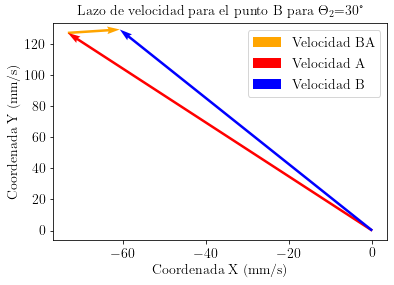

In [14]:
index=[i for i, j in enumerate(theta2_lista) if j<=np.deg2rad(30)+0.0003 and j>=np.deg2rad(30)-0.0003]
Va_x=VA_X[index[0]]
Va_y=VA_Y[index[0]]
Va=VA[index[0]]

Vb_x=VB_X[index[0]]
Vb_y=VB_Y[index[0]]
Vb=VB[index[0]]

Vba_x=-b*omega3_lista[index[0]]*np.sin(theta3_lista[index[0]])
Vba_y=b*omega3_lista[index[0]]*np.cos(theta3_lista[index[0]])

plt.quiver(Va_x, Va_y, Vba_x, Vba_y, color='orange', angles='xy', scale_units='xy', scale=1, label='Velocidad BA')
plt.quiver(0, 0, Va_x, Va_y, color='red', angles='xy', scale_units='xy', scale=1, label='Velocidad A')
plt.quiver(0, 0, Vb_x, Vb_y, color='blue', angles='xy', scale_units='xy', scale=1, label='Velocidad B')
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Lazo de velocidad para el punto B para $\Theta_2$=30°', fontsize=14)
plt.xlabel('Coordenada X (mm/s)', fontsize=14)
plt.ylabel('Coordenada Y (mm/s)', fontsize=14)
plt.savefig('lazovelB.png')
plt.show()

[833]


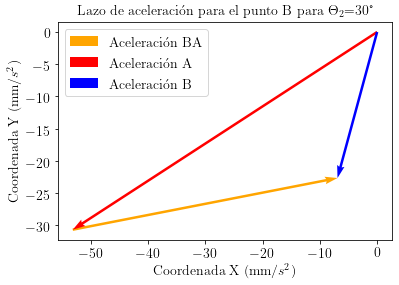

In [15]:
index=[i for i, j in enumerate(theta2_lista) if j<=np.deg2rad(30)+0.0003 and j>=np.deg2rad(30)-0.0003]
print(index)
Aa_x=AA_X[index[0]]
Aa_y=AA_Y[index[0]]

Ab_x=AB_X[index[0]]
Ab_y=AB_Y[index[0]]

Aba_x=-2000*(alfa3_lista[index[0]]*np.sin(theta3_lista[index[0]])+omega3_lista[index[0]]**2*np.cos(theta3_lista[index[0]]))
Aba_y=2000*(alfa3_lista[index[0]]*np.cos(theta3_lista[index[0]])-omega3_lista[index[0]]**2*np.sin(theta3_lista[index[0]]))

plt.quiver(Aa_x, Aa_y, Aba_x, Aba_y, color='orange', angles='xy', scale_units='xy', scale=1, label='Aceleración BA')
plt.quiver(0, 0, Aa_x, Aa_y, color='red', angles='xy', scale_units='xy', scale=1, label='Aceleración A')
plt.quiver(0, 0, Ab_x, Ab_y, color='blue', angles='xy', scale_units='xy', scale=1, label='Aceleración B')
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Coordenada X (mm/$s^2$)', fontsize=14)
plt.ylabel('Coordenada Y (mm/$s^2$)', fontsize=14)
plt.title('Lazo de aceleración para el punto B para $\Theta_2$=30°', fontsize=14)
plt.savefig('lazoacB.png')
plt.show()